In [1]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
import convert, MPI_collective


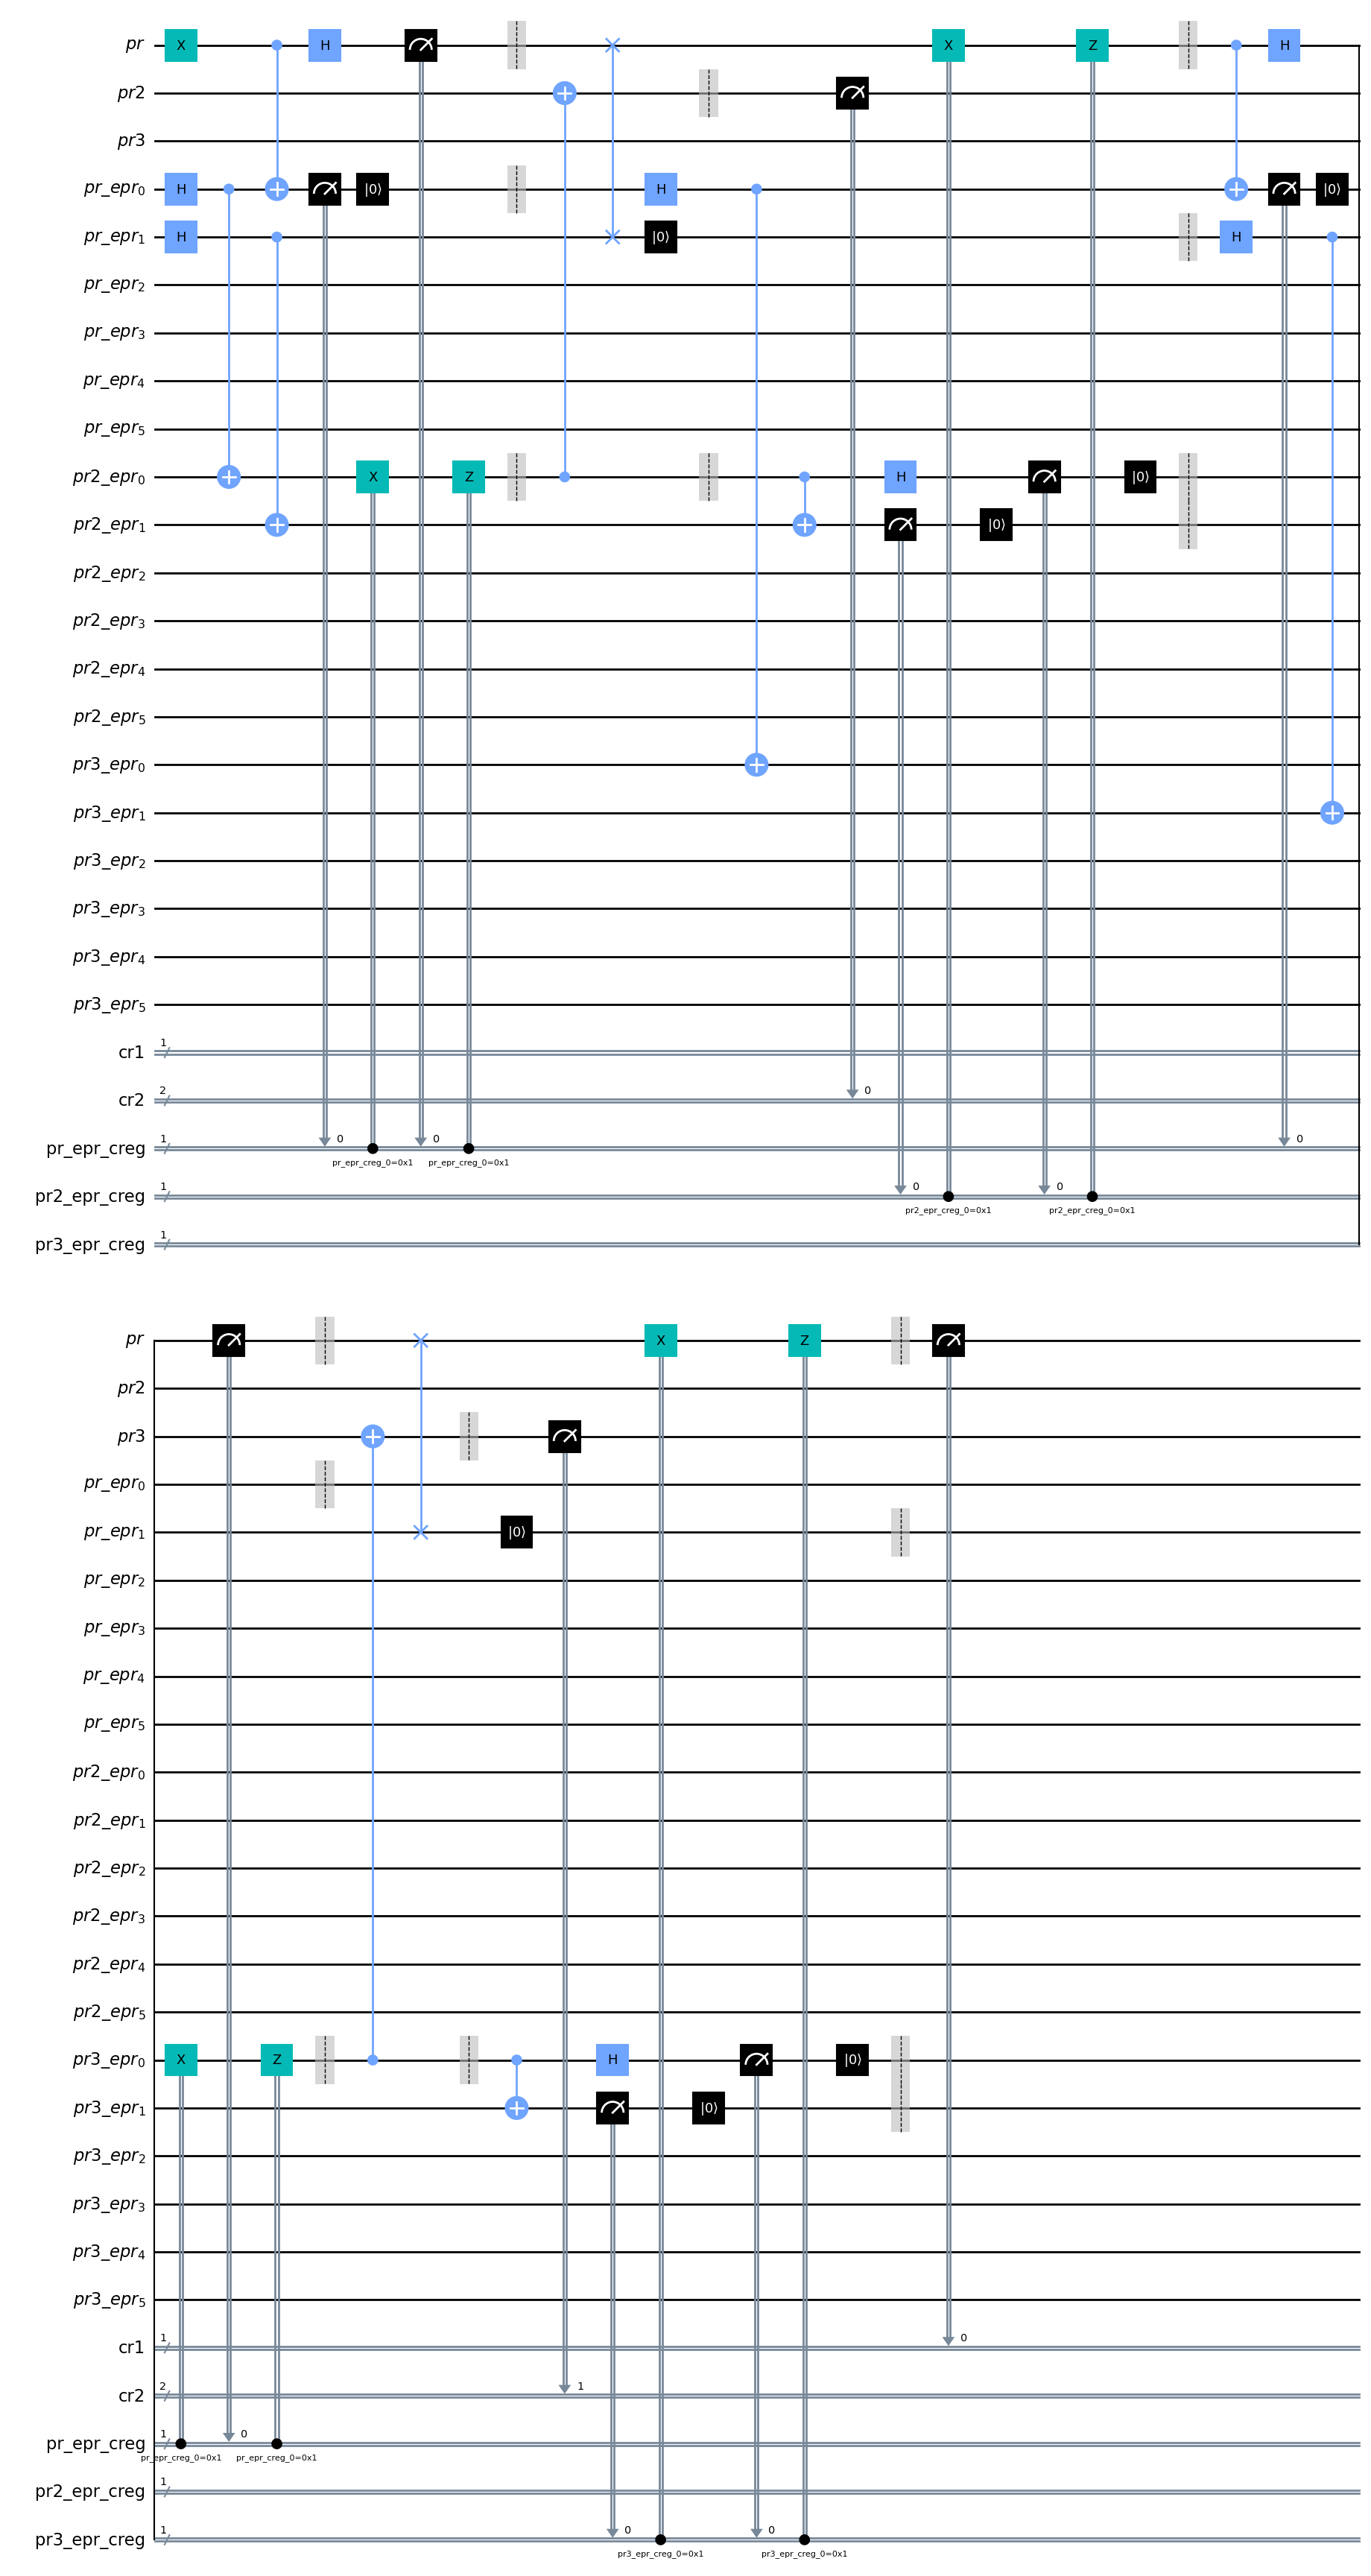

In [2]:
# check out brodcast
pp = QuantumCircuit()
pr = QuantumRegister(1, 'pr')
pr2 = QuantumRegister(1, 'pr2')
pr3 = QuantumRegister(1, 'pr3')
cr1 = ClassicalRegister(1, 'cr1')
cr2 = ClassicalRegister(2, 'cr2')
pp.add_register(pr,pr2,pr3,cr1,cr2)
pp.x(pr[0])
m = MPI_collective.CollectiveMPI(pp, pr)
m.brodcast(pr[0], [pr2[0],pr3[0]])
pp.measure([pr[0], pr2[0],pr3[0]], [cr1[0], cr2[0],cr2[1]])
pp.draw('mpl')

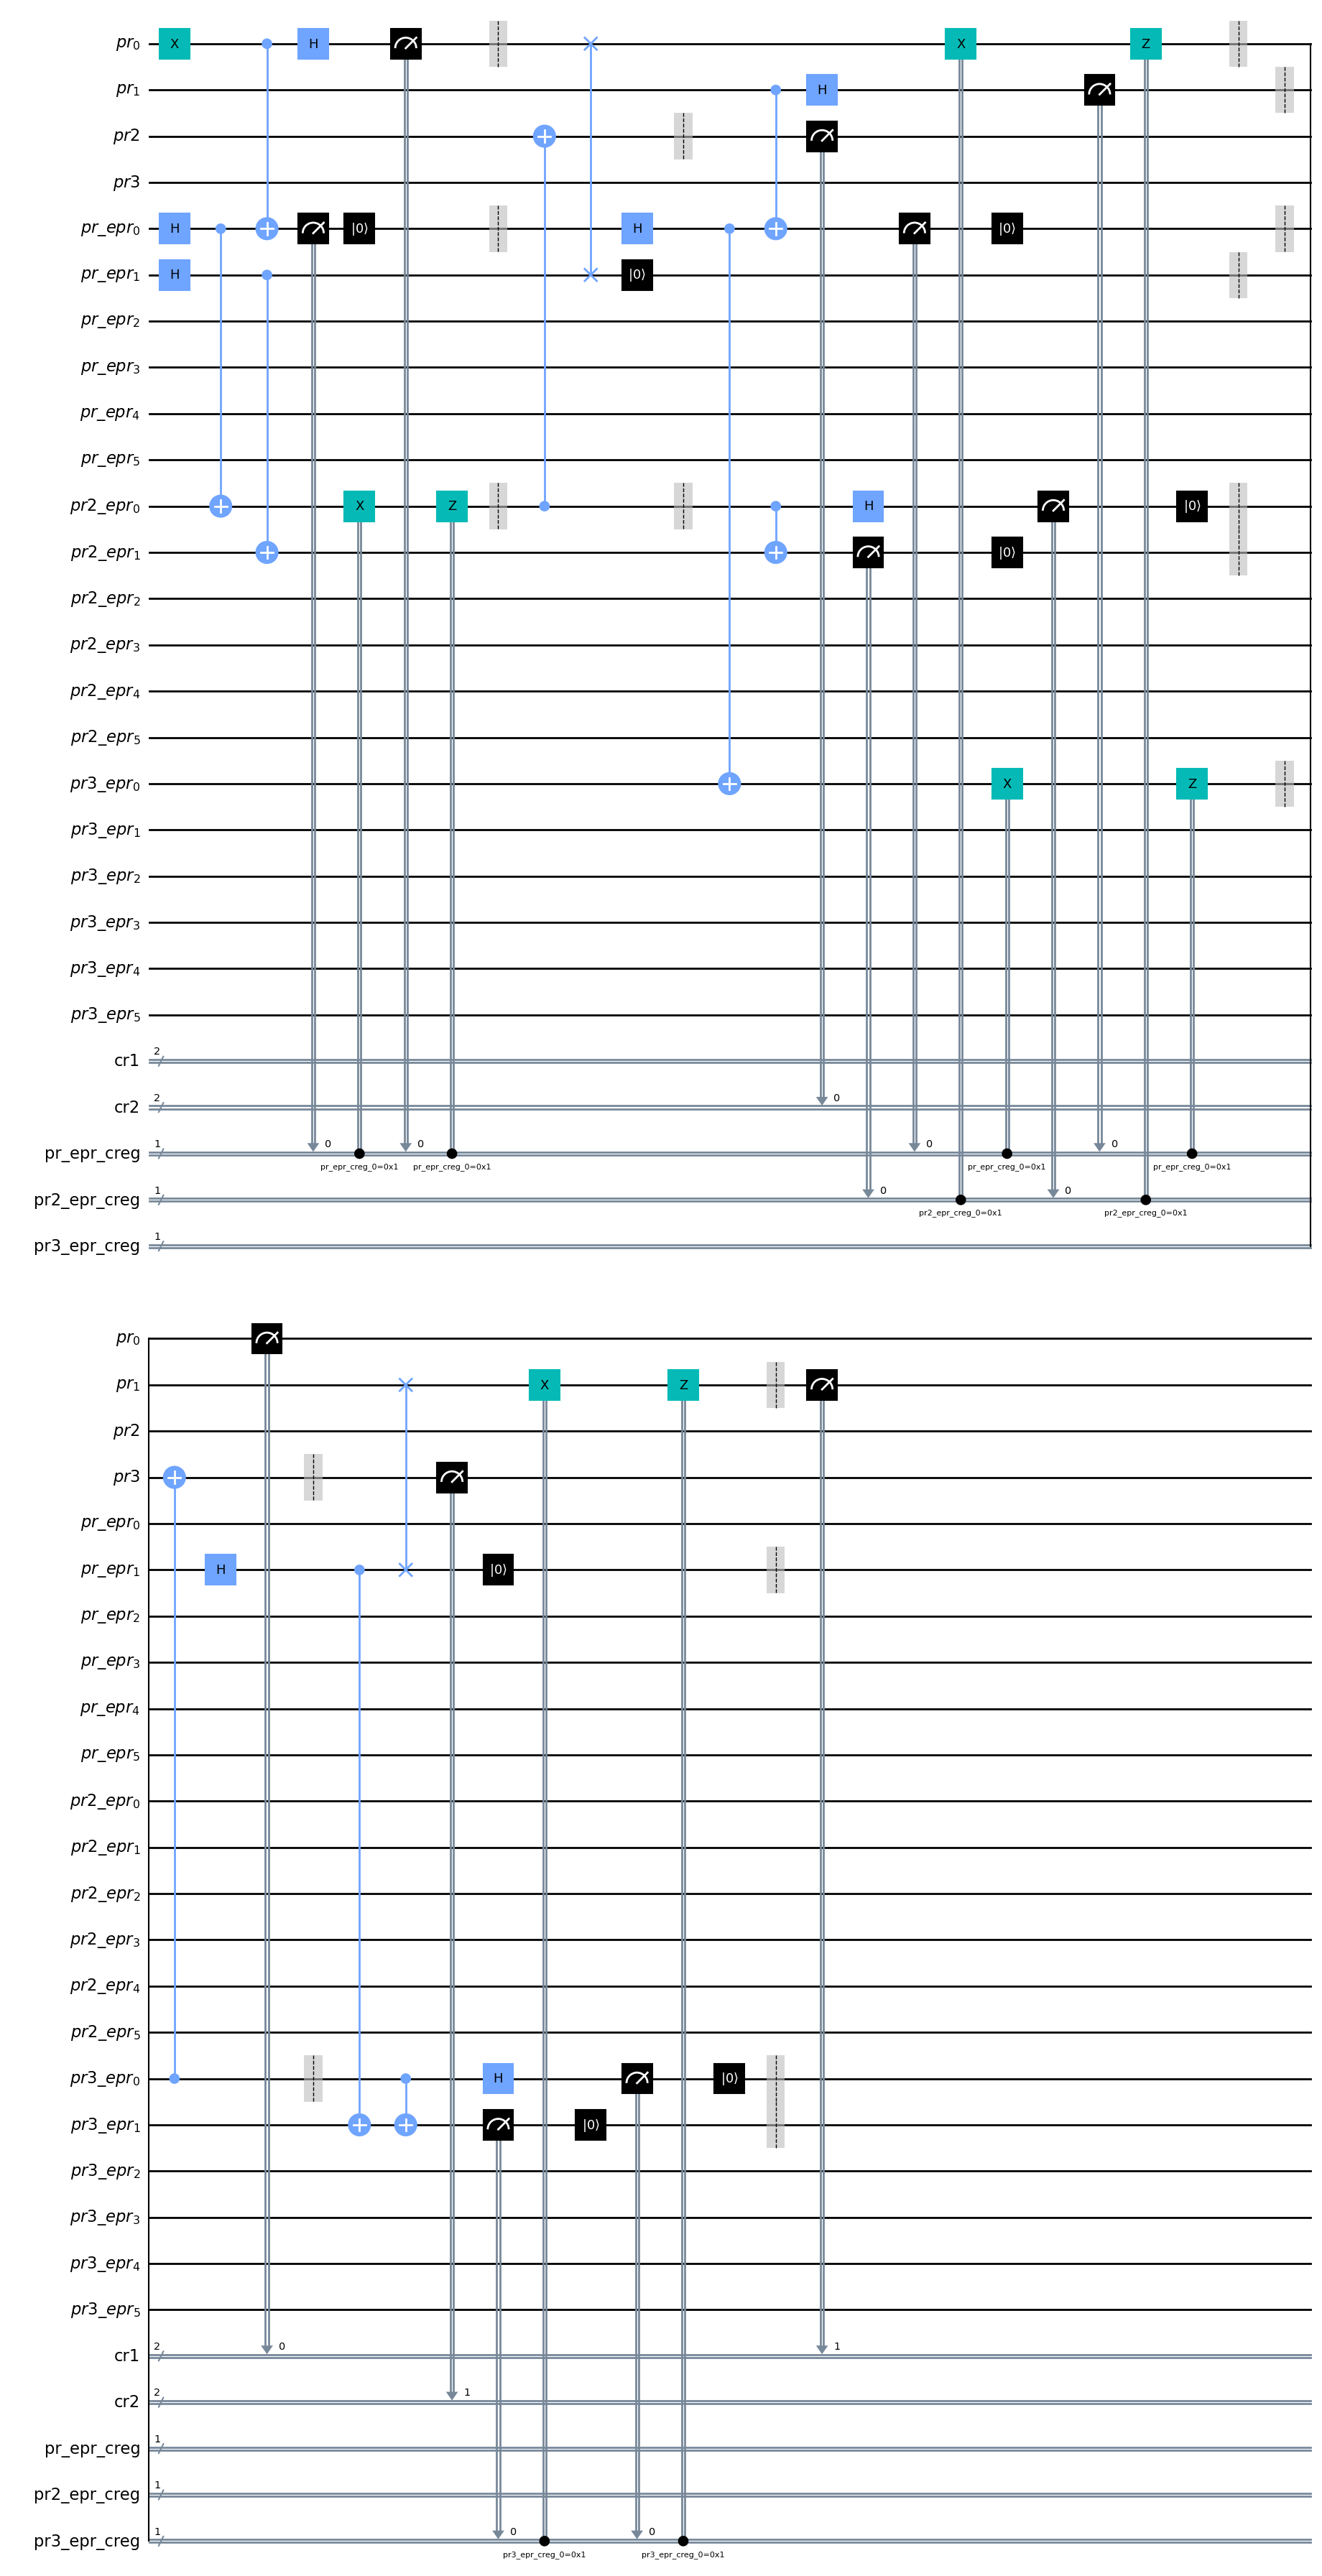

In [9]:
# check out scatter
pp = QuantumCircuit()
pr = QuantumRegister(2, 'pr')
pr2 = QuantumRegister(1, 'pr2')
pr3 = QuantumRegister(1, 'pr3')
cr1 = ClassicalRegister(2, 'cr1')
cr2 = ClassicalRegister(2, 'cr2')
pp.add_register(pr,pr2,pr3,cr1,cr2)
pp.x(pr[0])
m = MPI_collective.CollectiveMPI(pp, pr)
m.scatter([pr[0], pr[1]], [pr2[0],pr3[0]])
pp.measure([pr[0],pr[1], pr2[0],pr3[0]], [cr1[0],cr1[1], cr2[0],cr2[1]])
pp.draw('mpl')

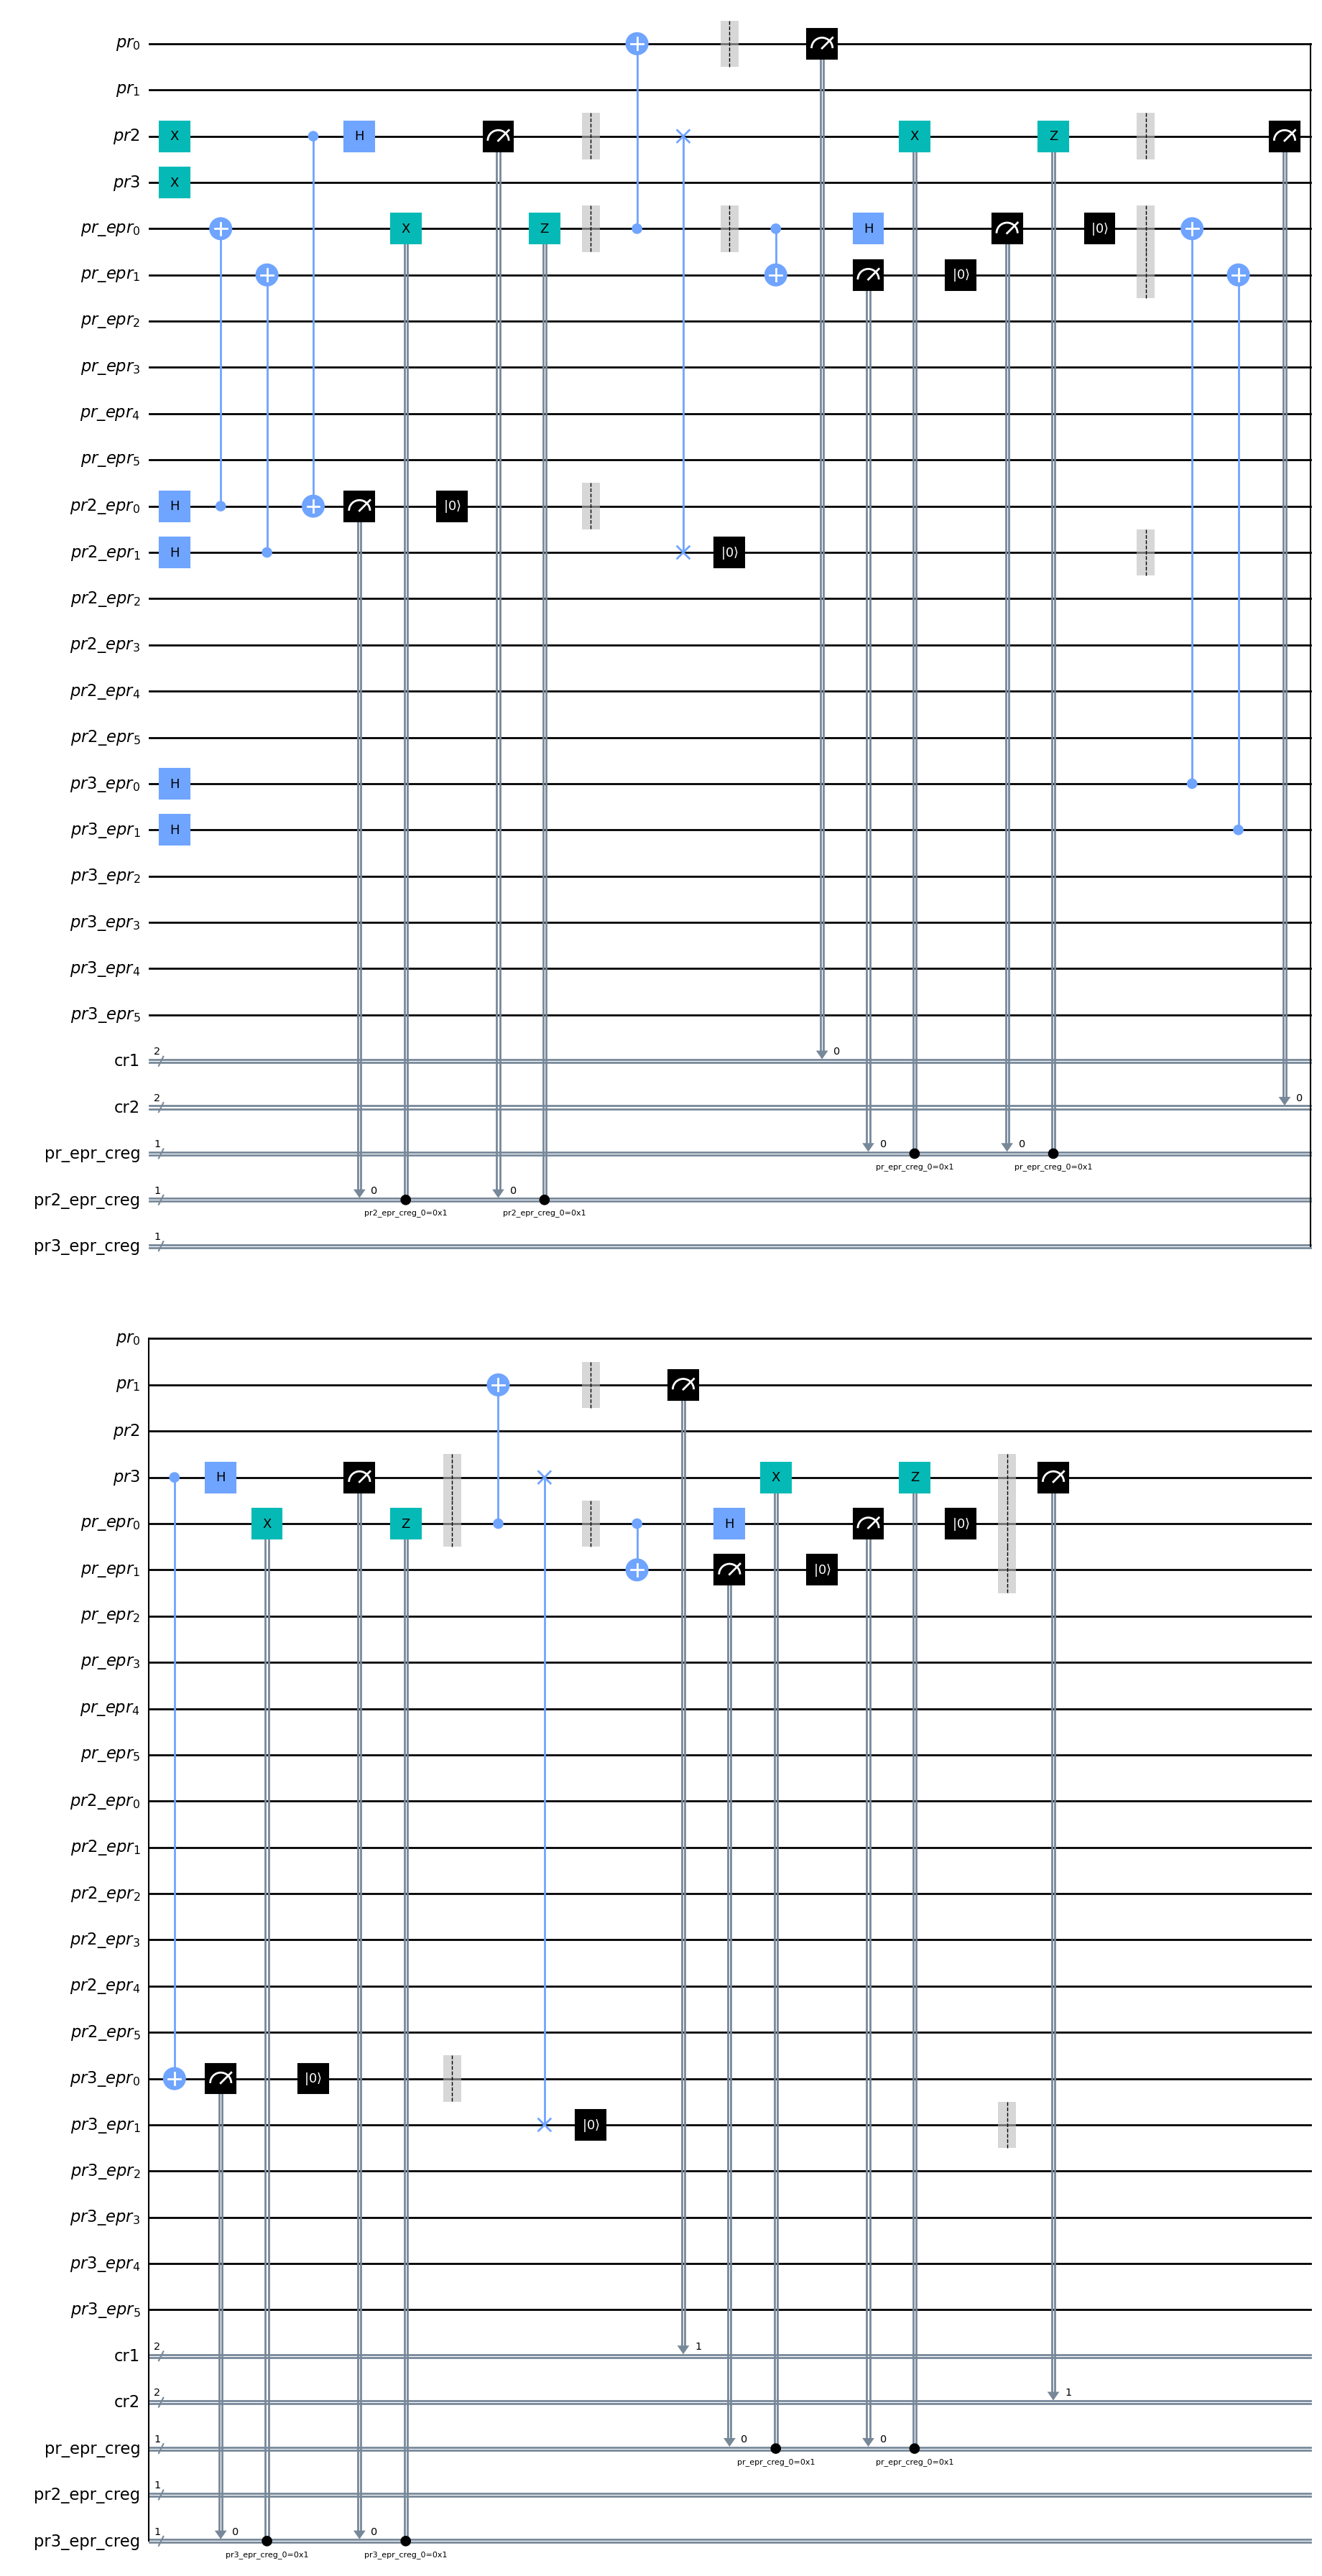

In [2]:
# check out gather
pp = QuantumCircuit()
pr = QuantumRegister(2, 'pr')
pr2 = QuantumRegister(1, 'pr2')
pr3 = QuantumRegister(1, 'pr3')
cr1 = ClassicalRegister(2, 'cr1')
cr2 = ClassicalRegister(2, 'cr2')
cr3 = ClassicalRegister(2, 'cr3')
pp.add_register(pr,pr2,pr3,cr1,cr2)
pp.x(pr2[0])
pp.x(pr3[0])
m = MPI_collective.CollectiveMPI(pp, pr)
m.gather([pr2[0], pr3[0]], [pr[0],pr[1]])
pp.measure([pr[0],pr[1], pr2[0],pr3[0]], [cr1[0],cr1[1], cr2[0],cr2[1]])
pp.draw('mpl')

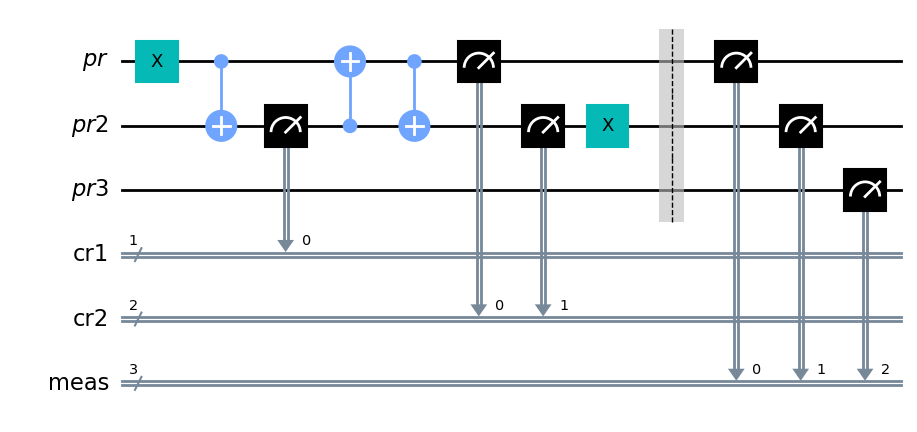

In [9]:
# point to point unit test 
pp = QuantumCircuit()
pr = QuantumRegister(1, 'pr')
pr2 = QuantumRegister(1, 'pr2')
pr3 = QuantumRegister(1, 'pr3')
cr1 = ClassicalRegister(1, 'cr1')
cr2 = ClassicalRegister(2, 'cr2')
pp.add_register(pr,pr2,cr1,cr2,pr3)
pp.x(pr[0])
pp.cx(pr[0],pr2[0])
pp.measure(pr2[0], cr1[0])
pp.cx(pr2[0],pr[0])
pp.cx(pr[0],pr2[0])
pp.measure([pr[0],pr2[0]], [cr2[0],cr2[1]])
pp.x(pr2[0])
pp.measure_all()
pp.draw('mpl')

In [8]:
run testCases.py


...
----------------------------------------------------------------------
Ran 3 tests in 2.315s

OK


In [3]:
pathname = "/Users/tommtommbom/Desktop/Classes/EE 522 - QMPI/QASMBench-master/small/hhl_n7/hhl_n7.qasm"
kks = QuantumCircuit.from_qasm_file(pathname)
#kks.draw('mpl')

{'1 0 0 11 11': 128, '0 1 0 11 11': 130, '0 0 0 11 11': 139, '0 1 1 11 11': 108, '1 0 1 11 11': 129, '0 0 1 11 11': 115, '1 1 1 11 11': 131, '1 1 0 11 11': 120}


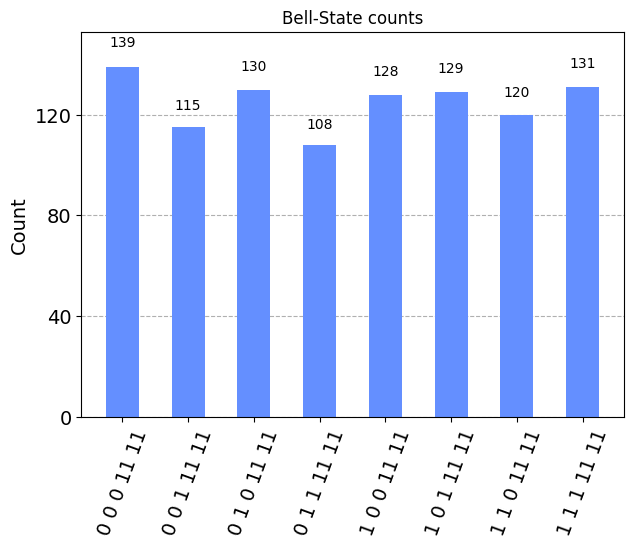

In [3]:
from qiskit import Aer
aer_sim = Aer.get_backend('aer_simulator')

from qiskit.visualization import plot_histogram
#pp2 = transpile(pp,aer_sim)
result = aer_sim.run(pp, shots = 1000).result()
counts = result.get_counts(pp)
print(counts)
plot_histogram(counts, title='Bell-State counts')


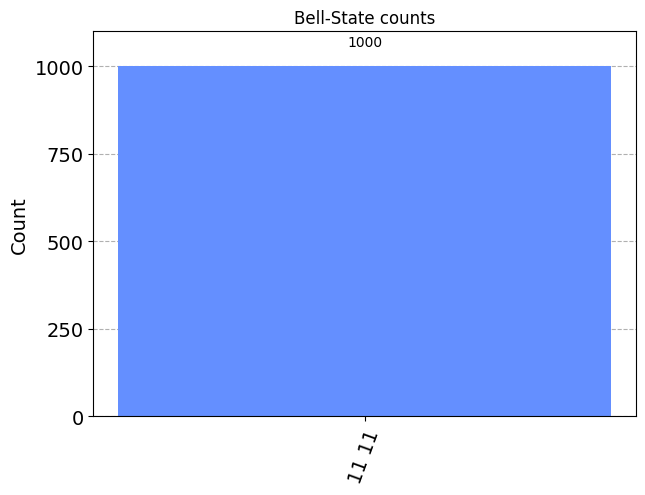

In [4]:
aa = convert.getActualCounts(pp,counts)
plot_histogram(aa, title='Bell-State counts')

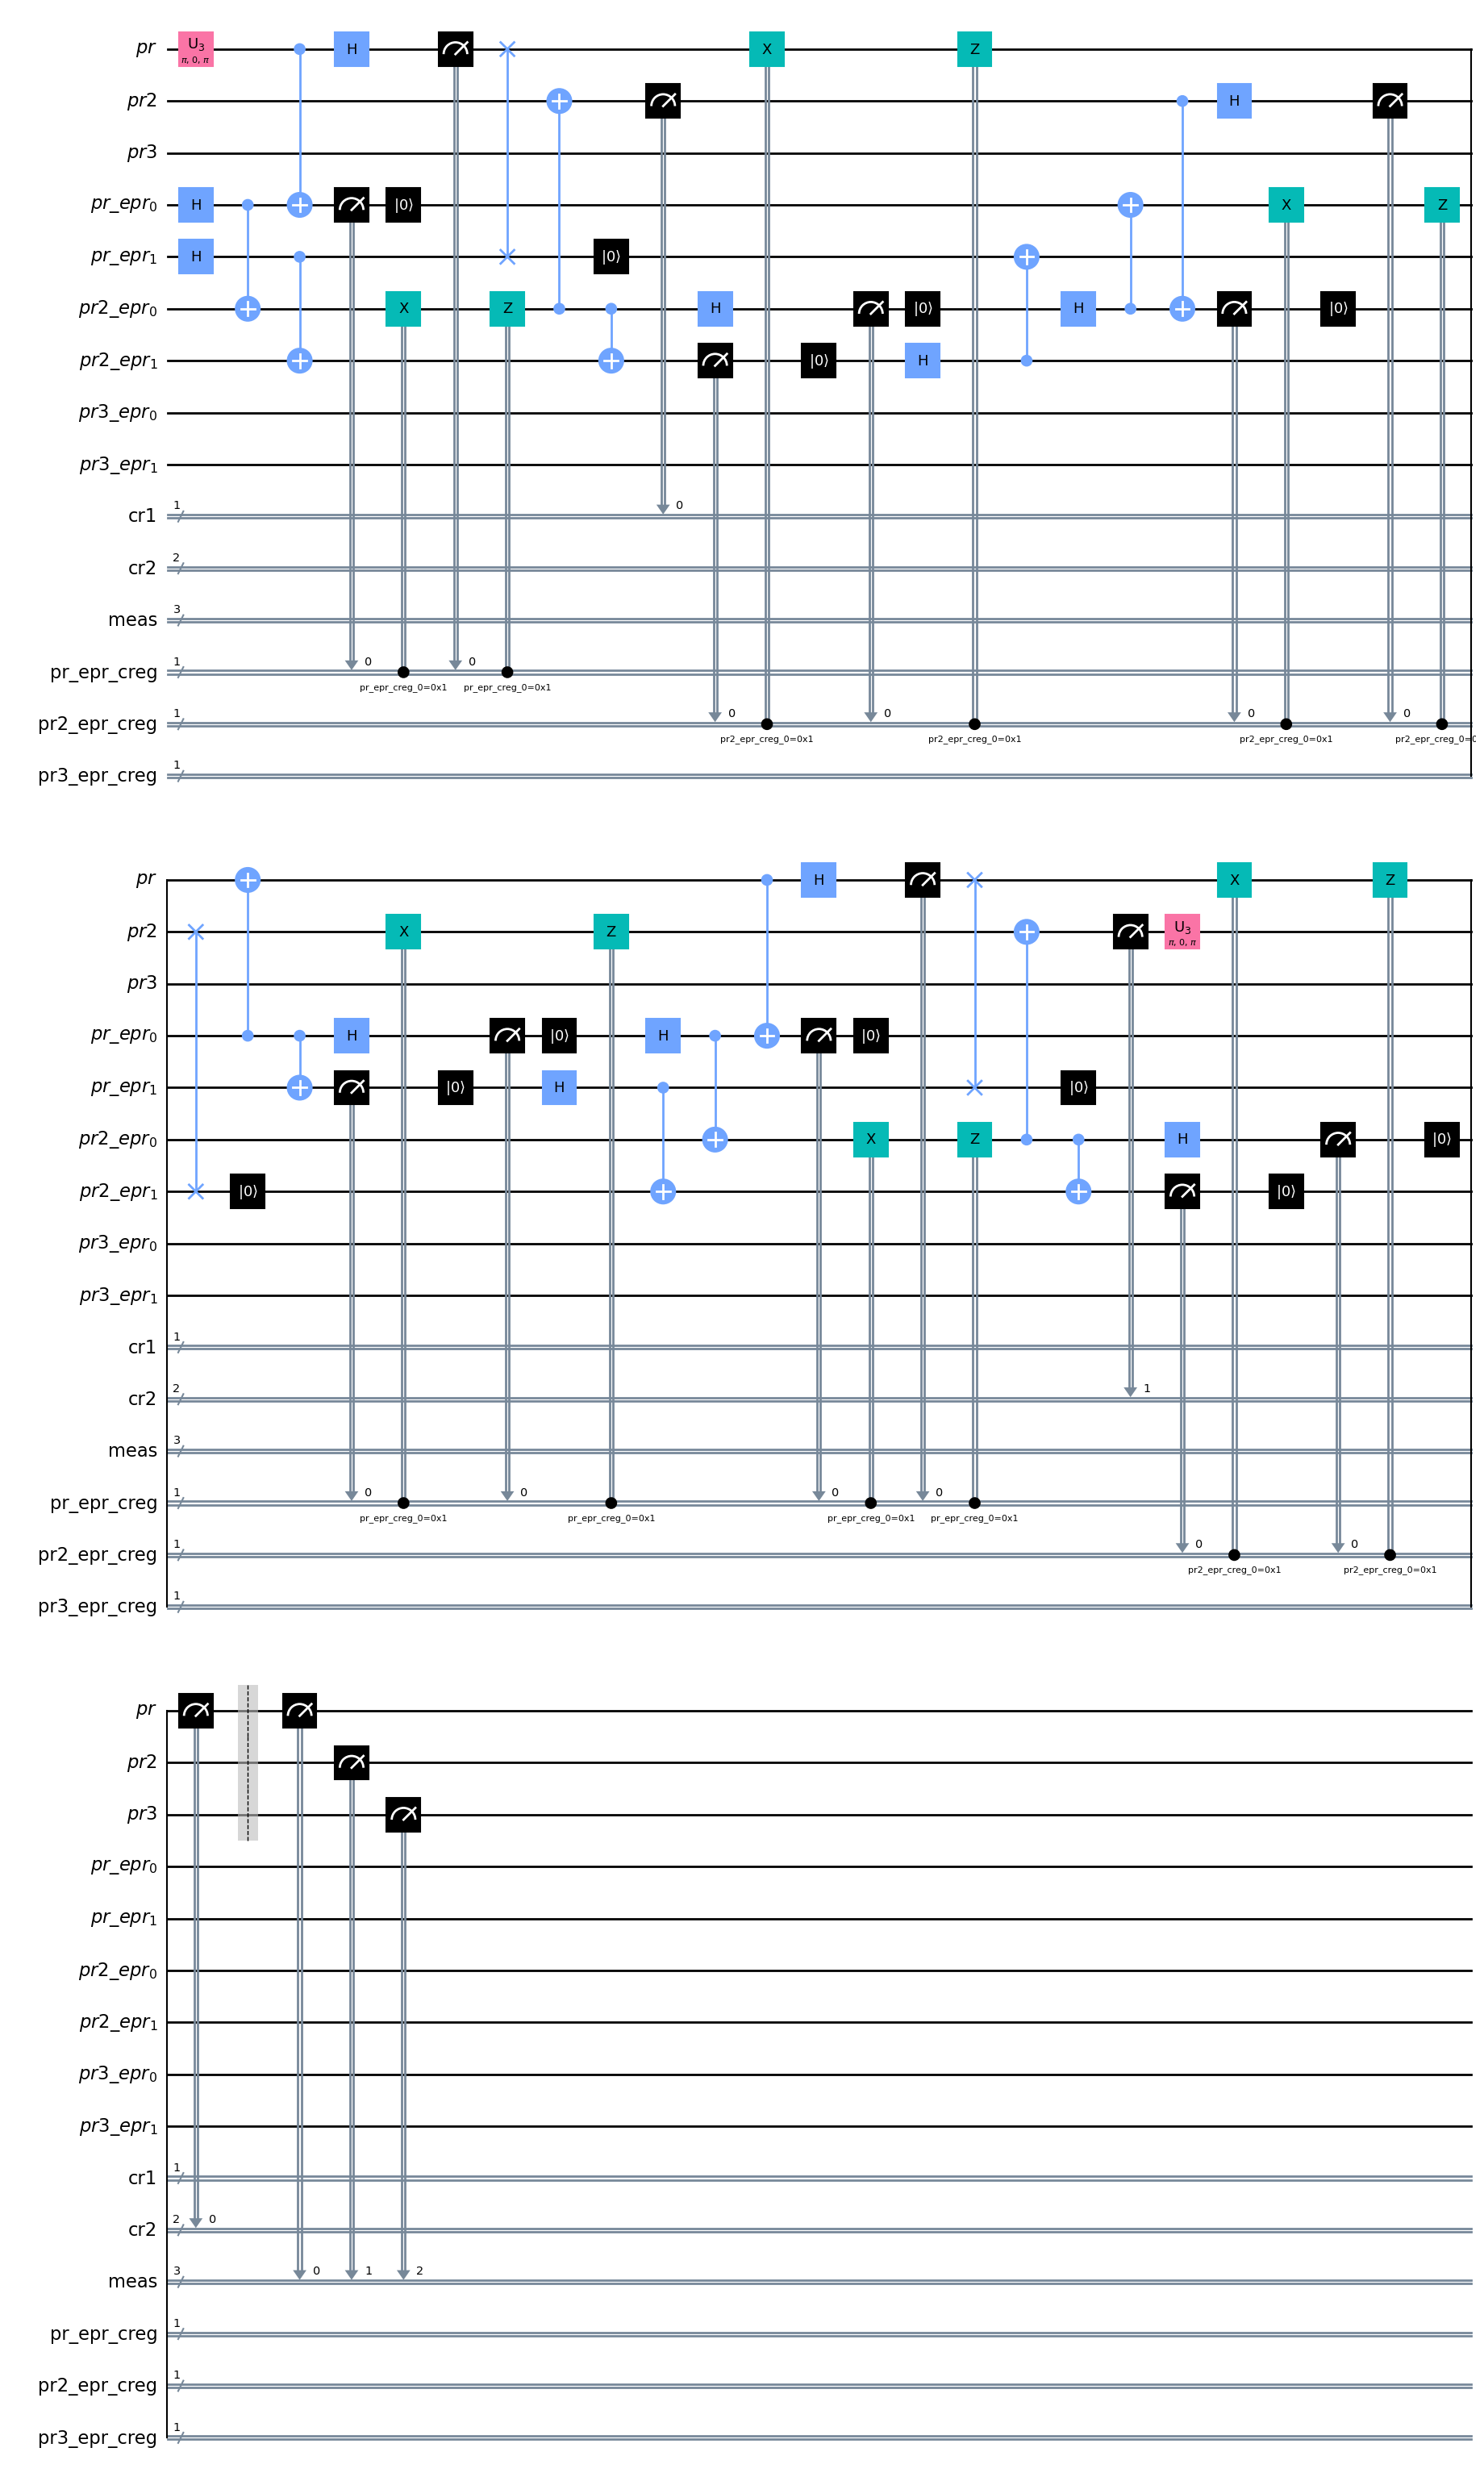

In [4]:
qtr,lol = convert.convertQC(pp)
qtr.draw("mpl")

{'0 1 0 000 10 1': 254, '0 0 0 000 10 1': 235, '0 0 1 000 10 1': 243, '0 1 1 000 10 1': 268}
{'pr_epr_creg': 1, 'pr2_epr_creg': 1, 'pr3_epr_creg': 0}


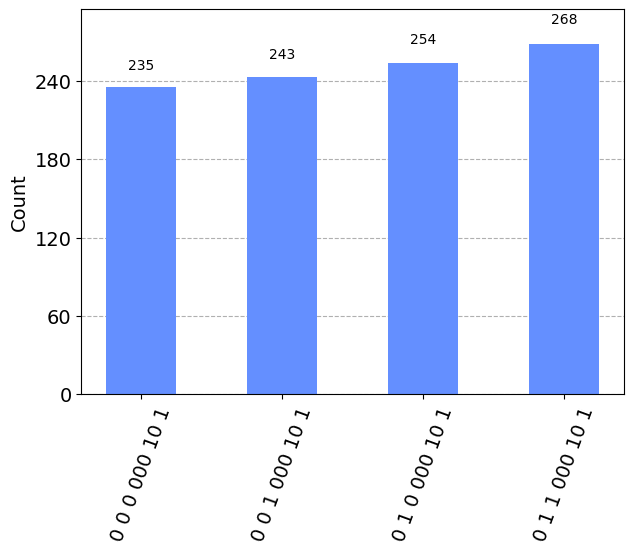

In [5]:
result = aer_sim.run(qtr, shots = 1000).result()
counts = result.get_counts(qtr)
print(counts)
print(qtr.metadata)
plot_histogram(counts)

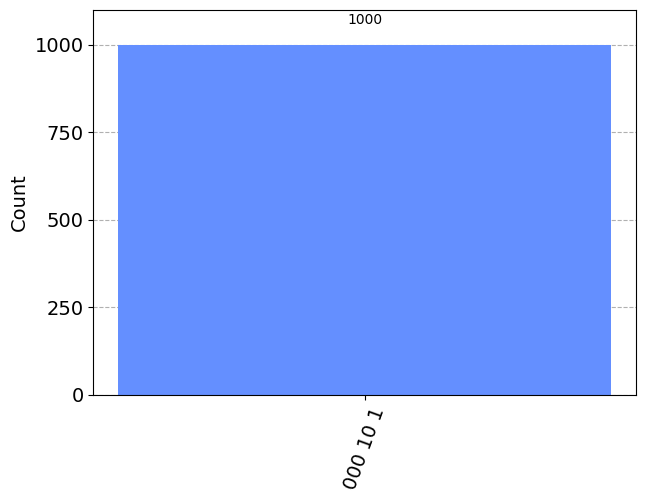

In [6]:
das = convert.getActualCounts(qtr, counts)
plot_histogram(das)

In [8]:
lol.eprConnections

{'pr': {'pr': 0, 'pr2': 3, 'pr3': 0},
 'pr2': {'pr': 3, 'pr2': 0, 'pr3': 0},
 'pr3': {'pr': 0, 'pr2': 0, 'pr3': 0}}